# Geant4 - Cherenkov Ring Visualization

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import pandas as pd
import os
import shutil
from datetime import datetime
import glob
import random

Simulation description: A beam of electrons is fired at an aerogel tile. The electron energy is set to 35 MeV (relativistic velocity). At this energy, the incident electron beam induces Cherenkov radiation. The optical photons form a detectable ring along the beam's vector.

### Simulation parameters are listed below: 
#### Geometric parameters
. World dimensions (x,y,z) (default: 2.m, 2.m, 2.m)
. Aerogel tile shape (bool) (default: false (true for curved))
. Box Aerogel tile dimensions (x,y,z) (default: 15cm, 15cm, 1.cm)
. Curved aerogel tile 
    . Inner radius (default: 20cm)
    . Outer radius (default: 16cm)
    . Half lenght (default: 15cm)
    . Starting angle (default: 0 rad) 
    . Segment angle (rad) (default: π/2 rad)
. Detector dimensions (x,y,z) (default: 40cm, 40cm, 1.mm)
#### Material paramaters
. Silica density 
. Aerogel density (default: 0.200 g/cm3)
. Proportion of silica in aerogel (default: 97%)
. Proportion of water in aerogel (default: 3%)
. Aerogel properties (TBD)
. World material type (switch)
    . 1: Atmosphere
    . 2: Vacuum
. Altitude (if world material is atmosphere) (switch)
    . 0: Sea level
    . 1: 
    . 2: 
#### Particle Generator parameters
. Number of primary particles (default: 100)
. Eletron energy (default 35 MeV)
. Distribution (switch)
    . 1: None
    . 2: Uniform
    . 3: Gaussian (default: mean=0, std_dev=1)
#### Physical processes
. Multiple scattering (bool)
. Ionization (bool)
. Bremsstrahlung
. Cerenkov (bool)
    . Max number of generated photons (100)
. Rayleigh scattering (bool)

In [2]:
def data_to_table(path, file):
    try: 
        with open(path+file, encoding='utf-8-sig') as f:
            content = f.readlines()
            content = [x.strip() for x in content]
    except:
        print('Wrong file or path name')
        return
    dataframes = []
    for i,line in enumerate(content):
        count = 0
        if i == len(content)-1: #if we reach the end of the document, create a DF
            df = pd.DataFrame({'Time': t, 'X': x, 'Y': y, 'Z': y,'Energy': E, 'Radius': r})
            dataframes.append(df)
        if line == '': #if line is blank, skip
            pass
        elif line[0] == '#'and line[-1] == '.' :
            pass
        elif  line[0] == '#' and line[2] == 'T'  : #event header
            if i == 2:
                pass
            else:
                df = pd.DataFrame({'Time': t, 'X': x, 'Y': y, 'Z': y,'Energy': E, 'Radius': r})
                dataframes.append(df)
            t,x,y,z,E,r = [],[],[],[],[],[]
        elif line[0].isnumeric() or line[0]=='-':
            values = line.split()
            x.append(float(values[1]))
            y.append(float(values[2]))
            z.append(float(values[3]))
            t.append(float(values[0]))
            r.append((float(values[1])**2 + float(values[2])**2)**0.5)
            if 'e' in values[4]:
                delim = values[4].index('e')
                num = values[4][:delim]
                mult = values[4][delim+3]
                number = float(num)*10**(-1*int(mult))
                if values[4][delim+1] ==' -':
                    number *= -1
                E.append(number)
            else:
                E.append(float(values[4]))
    return dataframes 

def get_event_info():
    pass

def remove_errors(df):
    df = df.dropna(axis = 0)
    df = df[abs(df['Radius']) < 200] #stay inside detector
    df = df[abs(df['Energy']) < 50]
    return df

def photon_remove_errors(df):
    df = df.dropna(axis = 0)
    df = df[abs(df['Radius']) > 50]
    return df  

def separate(df):
    elec = df[df['Energy'] > 5]
    photon = df[df['Energy'] < 5]
    return photon, elec
    
def move_file():
    now = datetime.now()
    datapath = '/Users/theojanson/Project/McGillPhysics/HelixRich/Code/Data/'
    date = now.strftime('%m.%d.%Y')
    if not os.path.isdir(datapath+date):
        os.mkdir(datapath + date) 
    #check for avalailable data
    if os.path.isfile('/Users/theojanson/Project/McGillPhysics/HelixRich/Code/Applications/HelixRich/HR-build/HelixRich.out'):
        date_time = now.strftime("%m.%d.%Y, %H:%M:%S")
        os.mkdir(datapath+'/'+date+'/'+date_time)
        shutil.move('/Users/theojanson/Project/McGillPhysics/HelixRich/Code/Applications/HelixRich/HR-build/HelixRich.out',
                    datapath+date+'/'+date_time+'/'+'HelixRich.out')
        return datapath+date+'/'+date_time+'/'
    else:
        print('Please input a valid path')
        
def join_events(dfs):
    df = dfs[0]
    for i in range(1,len(dfs)):
        if len(dfs[i]) > 0:
            df = df.append(dfs[i], ignore_index=True)
    return df

### Electron Beam Analysis 

### Cherenkov Ring Example

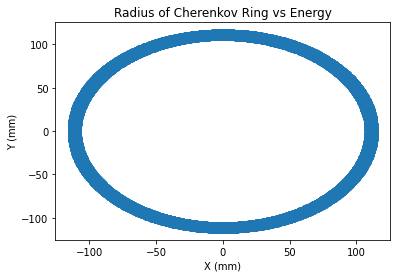

In [4]:
path = '/Users/theojanson/Project/McGillPhysics/HelixRich/Code/Data/06.17.2021/'
dfs = data_to_table(path,'35MEVHelixRich.out')
df = remove_errors(dfs[0])
photon, elec = separate(df)
photon = photon_remove_errors(photon)
plt.scatter(photon['X'], photon['Y'])
plt.xlabel('X (mm)'), plt.ylabel('Y (mm)')
plt.title('Radius of Cherenkov Ring vs Energy')
plt.show()

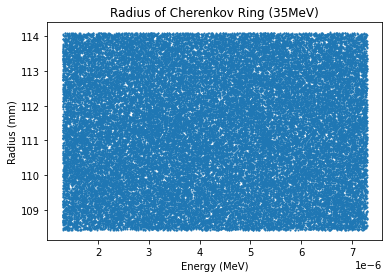

In [5]:
plt.scatter(photon['Energy'],photon['Radius'],s = 1, cmap = 'Blues')
plt.xlabel('Energy (MeV)'), plt.ylabel('Radius (mm)')
plt.title('Radius of Cherenkov Ring (35MeV)')
plt.show()

### Energy Analysis
#### Cherenkov Radius as Function of Energy

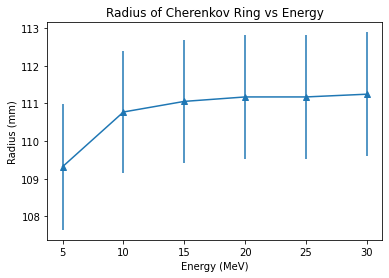

In [6]:
data = [data_to_table(path,f'{i}MEVHelixRich.out') for i in range(5,35,5)]
photon_data = []
for dfs in data: 
    ph, _ = separate(dfs[0])
    photon_data.append(ph)
mean_radii,std_dev = [],[]
for data in photon_data:
    data = remove_errors(data)
    data = photon_remove_errors(data)
    mean_radii.append(np.mean(data['Radius']))
    std_dev.append(np.std(data['Radius']))
e = [n for n in range(5,35,5)]
plt.errorbar(e, mean_radii, std_dev, marker='^')
plt.xlabel('Energy (MeV)'), plt.ylabel('Radius (mm)')
plt.title('Radius of Cherenkov Ring vs Energy')
plt.show()


#### Wavelength of Cherenkov Photons

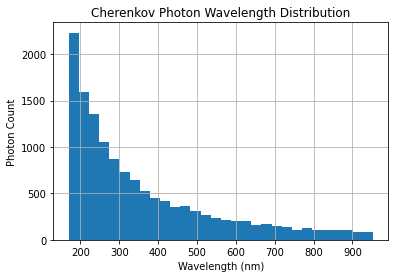

In [7]:
path = '/Users/theojanson/Project/McGillPhysics/HelixRich/Code/Data/06.22.2021/'
file = 'wavelengths.out'
dfs = data_to_table(path,file)
df, _ = separate(dfs[1])
df = remove_errors(df)
df = photon_remove_errors(df)
c, h = 299792458, 6.62607004E-34 #speed of light, plank constant
wavelengths = [(c*h)/(e*10.0e5*1.60218e-19) for e in df['Energy']] #convert Joule to ev to mev
wavelengths = [w for w in wavelengths if w > 1e-9]
wavelengths = [w*1e9 for w in wavelengths]
fig = plt.figure()
plt.title('Cherenkov Photon Wavelength Distribution')
plt.hist(wavelengths, bins=30)
plt.ylabel('Photon Count'), plt.xlabel('Wavelength (nm)')
plt.grid(True)
plt.show()

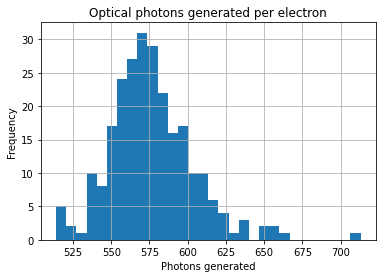

Mean photons generated: 576.6305220883534
Sigma: 27.525235448119453


In [8]:
path = '/Users/theojanson/Project/McGillPhysics/HelixRich/Code/Data/06.22.2021/'
file = 'photon_count.out'
dfs = data_to_table(path,file)
counts = [len(d) for d in dfs if len(d) < 1000]
plt.title('Optical photons generated per electron')
plt.grid(True), plt.xlabel('Photons generated'), plt.ylabel('Frequency')
plt.hist(counts, bins = 30)
plt.show()
print(f'Mean photons generated: {np.mean(np.array(counts))}')
print(f'Sigma: {np.std(np.array(counts))}')

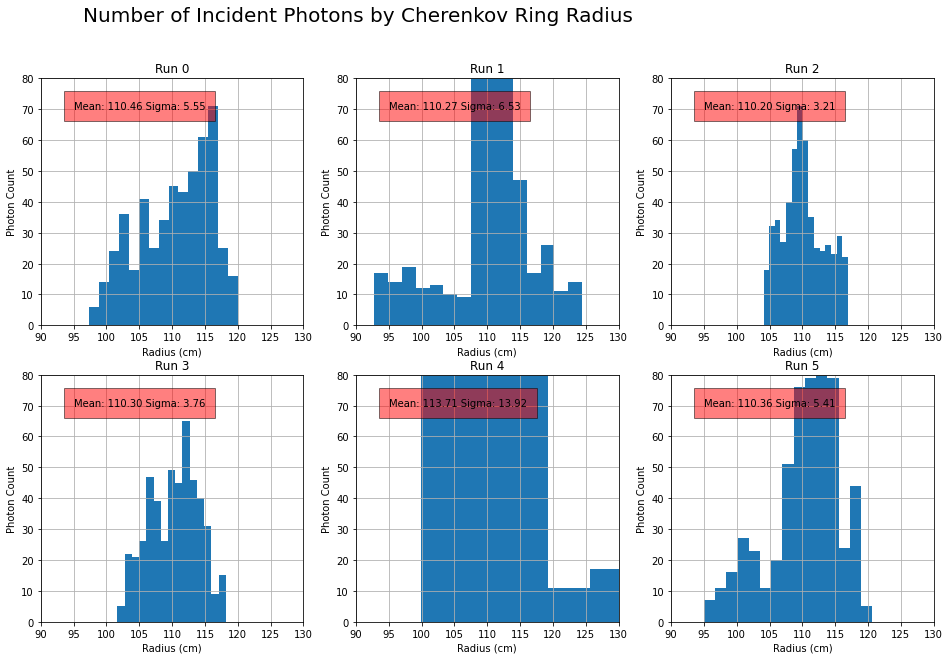

In [9]:
path = '/Users/theojanson/Project/McGillPhysics/HelixRich/Code/Data/06.22.2021/'
file = 'photon_count.out'
dfs = data_to_table(path, file)
indices = random.sample(range(0,len(dfs)-1), 6)
fig = plt.figure(figsize= (16,10))
plt.suptitle('Number of Incident Photons by Cherenkov Ring Radius',fontsize=20, x =0.4)
for i,j in enumerate(indices):
    photon, electron = separate(remove_errors(dfs[j]))
    photon = photon_remove_errors(photon)
    ax = fig.add_subplot(2,3,i+1)
    mean = np.mean(np.array(photon['Radius']))
    sigma = np.std(np.array(photon['Radius']))
    plt.title(f'Run {i}')
    plt.hist(photon['Radius'], bins = 15)
    plt.ylim((0, 80)), plt.xlim((90, 130)) 
    plt.grid(True), plt.ylabel('Photon Count'), plt.xlabel('Radius (cm)')
    ax.text(95,70, f'Mean: {mean:0.2f} Sigma: {sigma:0.2f}', bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
plt.show()


### Physical Processes

### Detector Geometry Analysis